In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates

from datetime import datetime

### Hodrick prescott filter

In [2]:
df = pd.read_csv('../Data/macrodata.csv', parse_dates=True, index_col=0)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


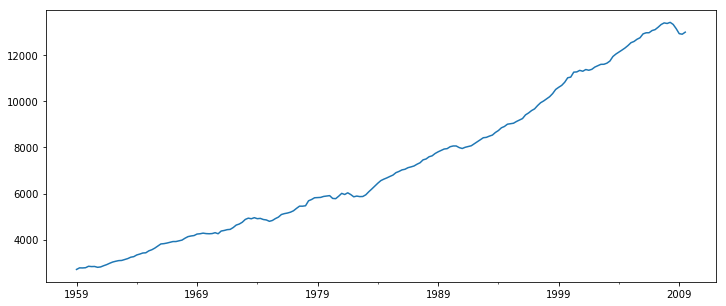

In [3]:
df['realgdp'].plot(figsize=(12,5))

In [4]:
# importing hodrick-prescott filter from statsmodels.tsa
from statsmodels.tsa.filters.hp_filter import hpfilter

In [5]:
gdp_cycle,gdp_trend = hpfilter(X=df['realgdp'], lamb=1600)

In [6]:
print(type(gdp_trend))
print(type(gdp_cycle))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


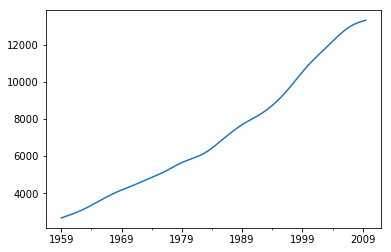

In [7]:
gdp_trend.plot()

In [8]:
df['gdp_trend'] = gdp_trend
df['gdp_cycle'] = gdp_cycle

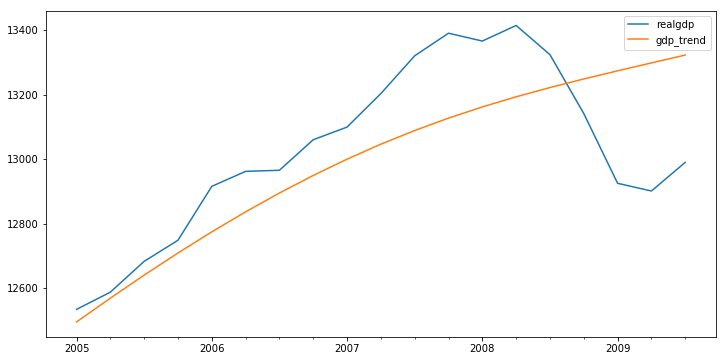

In [9]:
df['2005-01-01':][['realgdp','gdp_trend']].plot(figsize=(12,6))

### ETS (Error-Trend-Seasonality) decomposition

In [10]:
airline = pd.read_csv('../Data/airline_passengers.csv', parse_dates=True, index_col='Month')

In [11]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [13]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [14]:
airline.dropna(inplace=True)

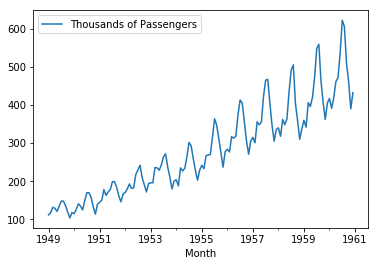

In [15]:
airline.plot()

In [16]:
# importing seasonal_decompose filter from statsmodels.tsa
from statsmodels.tsa.seasonal import seasonal_decompose

In [17]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

In [18]:
type(result)

statsmodels.tsa.seasonal.DecomposeResult

In [19]:
# result.observed
# result.trend
# result.seasonal
# result.resid

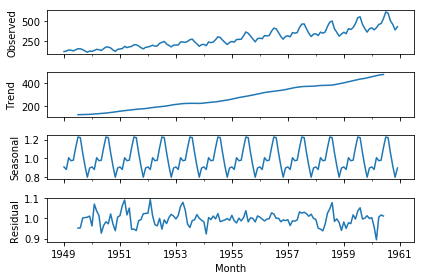

In [20]:
result.plot();

In [21]:
from pylab import rcParams

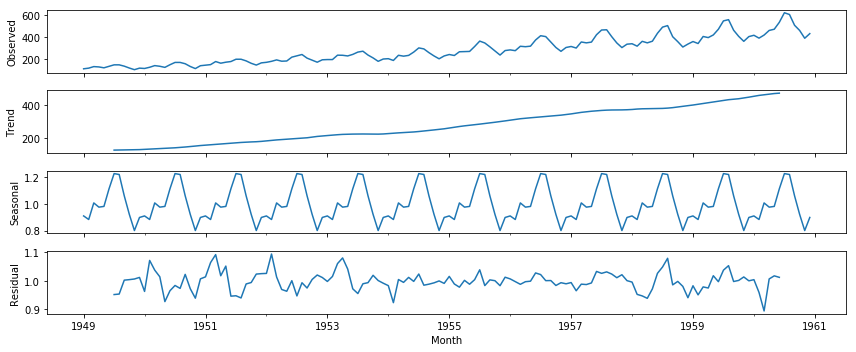

In [22]:
rcParams['figure.figsize'] = 12,5
result.plot();

### SMA (Simple Moving Average)

In [23]:
airline = pd.read_csv('../Data/airline_passengers.csv', index_col=0)

In [24]:
airline.dropna(inplace=True)

In [25]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [26]:
airline.index = pd.to_datetime(airline.index)

In [27]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [28]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
airline['SMA_6  months'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['SMA_12  months'] = airline['Thousands of Passengers'].rolling(window=12).mean()

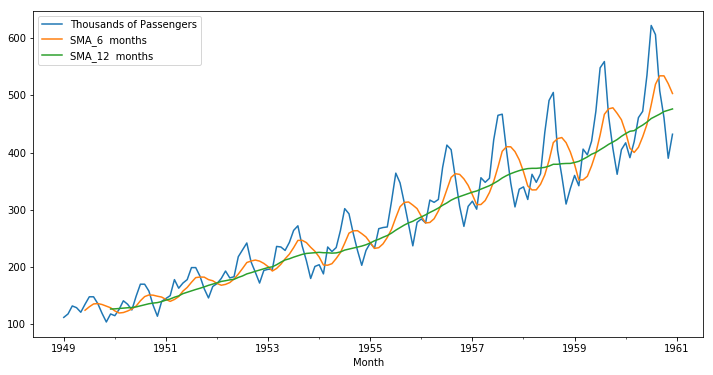

In [30]:
airline.plot(figsize=(12,6))

### EWMA (Exponentially Weighted Moving Average) model

In [31]:
airline['EWMA_12  months'] = airline['Thousands of Passengers'].ewm(span=12).mean()

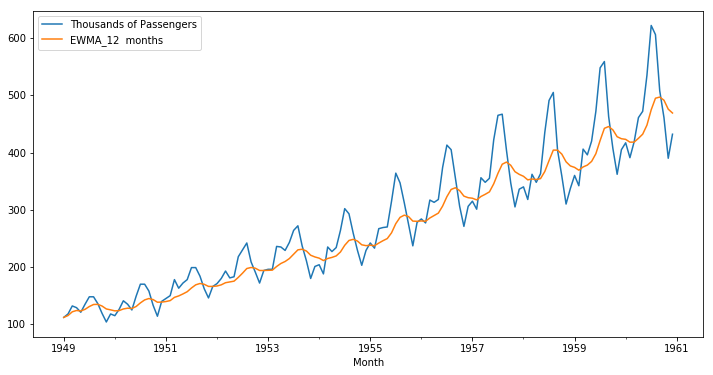

In [32]:
airline[['Thousands of Passengers','EWMA_12  months']].plot(figsize=(12,6))

### Holt-Winters method

In [33]:
airline = pd.read_csv('../Data/airline_passengers.csv', parse_dates=True, index_col='Month')
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
airline.dropna(inplace= True)

In [35]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [36]:
airline.index.freq = 'MS'

In [37]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### Simple exponential smoothing

In [38]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [39]:
span = 12
alpha = 2/(span+1)

In [40]:
airline['EWMA_12'] = airline['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [41]:
airline.head()

,Thousands of Passengers,EWMA_12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [42]:
SES = SimpleExpSmoothing(airline['Thousands of Passengers'])

In [43]:
SES.fit(smoothing_level=alpha,optimized=False)

In [44]:
fitted_SES = SES.fit(smoothing_level=alpha,optimized=False)

In [45]:
fitted_SES.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
1949-06-01    118.359861
1949-07-01    120.919883
1949-08-01    125.086055
1949-09-01    128.611277
1949-10-01    129.748004
1949-11-01    128.094465
1949-12-01    124.387624
1950-01-01    123.404912
1950-02-01    122.111849
1950-03-01    122.710026
1950-04-01    125.523868
1950-05-01    126.981735
1950-06-01    126.676852
1950-07-01    130.111183
1950-08-01    136.247924
1950-09-01    141.440551
1950-10-01    143.988159
1950-11-01    142.297673
1950-12-01    137.944185
1951-01-01    138.260464
1951-02-01    139.297316
1951-03-01    140.943882
1951-04-01    146.644824
1951-05-01    149.161005
1951-06-01    152.674696
                 ...    
1958-07-01    366.828136
1958-08-01    385.931500
1958-09-01    404.249730
1958-10-01    404.211310
1958-11-01    397.255724
1958-12-01    383.831767
1959-01-01    376.626879
1959-02-01    374.068898
1959-03-01    369.1

In [46]:
airline['SES_12'] = fitted_SES.fittedvalues.shift(-1)

In [47]:
airline.head()

,Thousands of Passengers,EWMA_12,SES_12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


### Double exponential smoothing (Holt method)

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

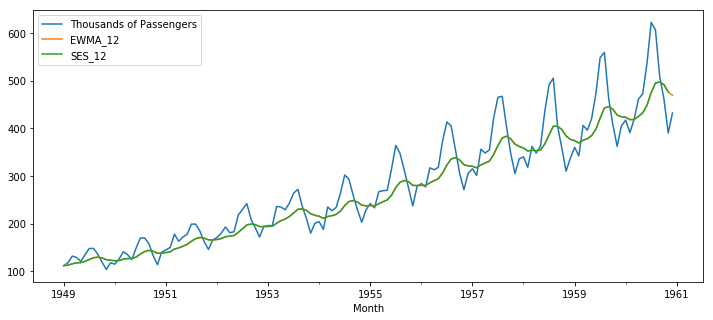

In [49]:
airline.plot()

In [50]:
airline['DES_add_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [51]:
airline

,Thousands of Passengers,EWMA_12,SES_12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336774
1949-02-01,118,112.923077,112.923077,120.336774
1949-03-01,132,115.857988,115.857988,134.336774
1949-04-01,129,117.879836,117.879836,131.336774
1949-05-01,121,118.359861,118.359861,123.336774
1949-06-01,135,120.919883,120.919883,137.336774
1949-07-01,148,125.086055,125.086055,150.336774
1949-08-01,148,128.611277,128.611277,150.336774
1949-09-01,136,129.748004,129.748004,138.336774


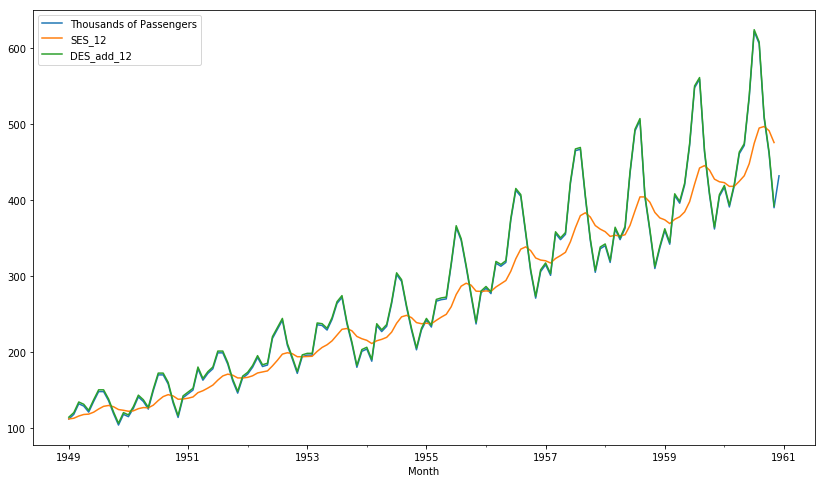

In [52]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12']].plot(figsize=(14,8))

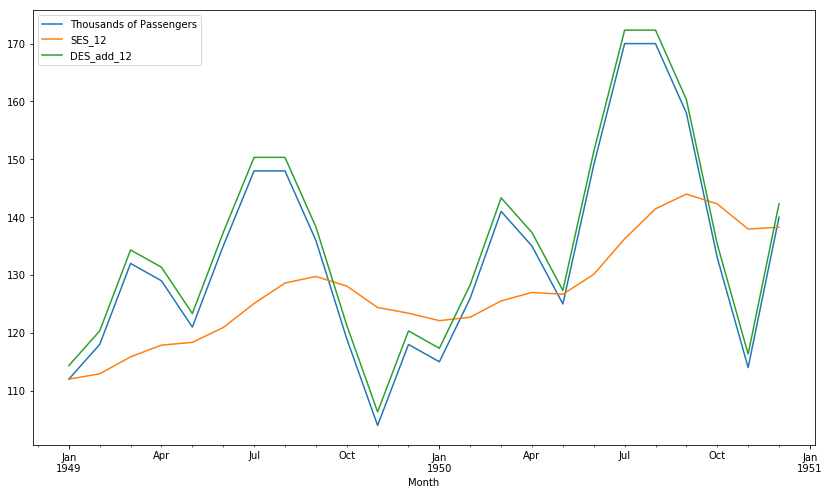

In [53]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12']].iloc[:24].plot(figsize=(14,8))

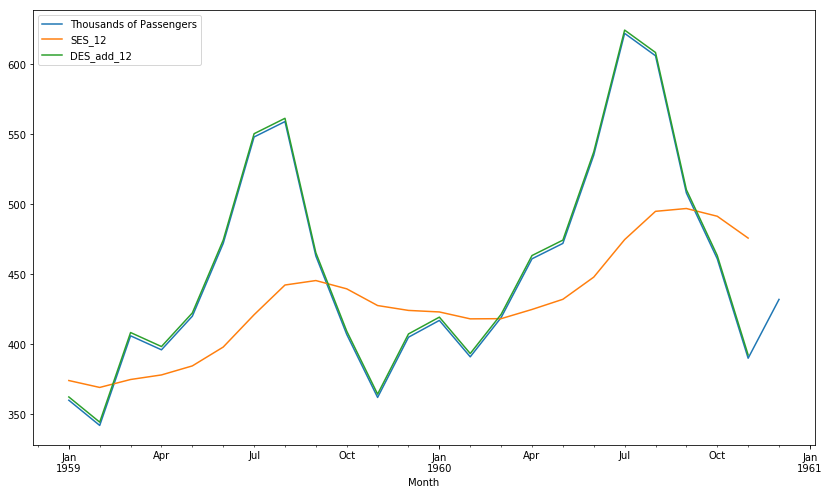

In [54]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12']].iloc[-24:].plot(figsize=(14,8))

In [55]:
airline['DES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

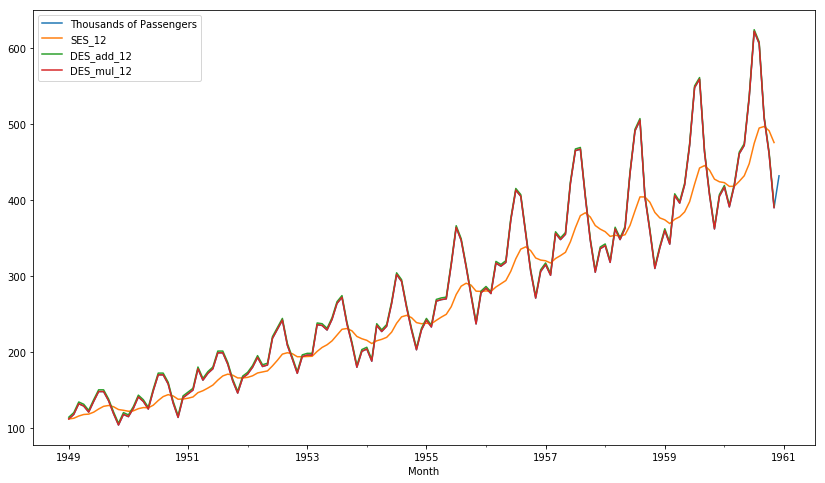

In [56]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12', 'DES_mul_12']].plot(figsize=(14,8))

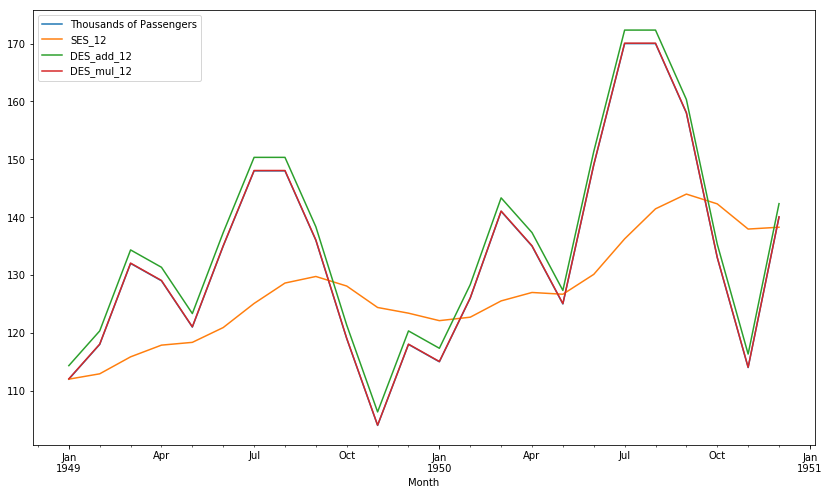

In [57]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(14,8))

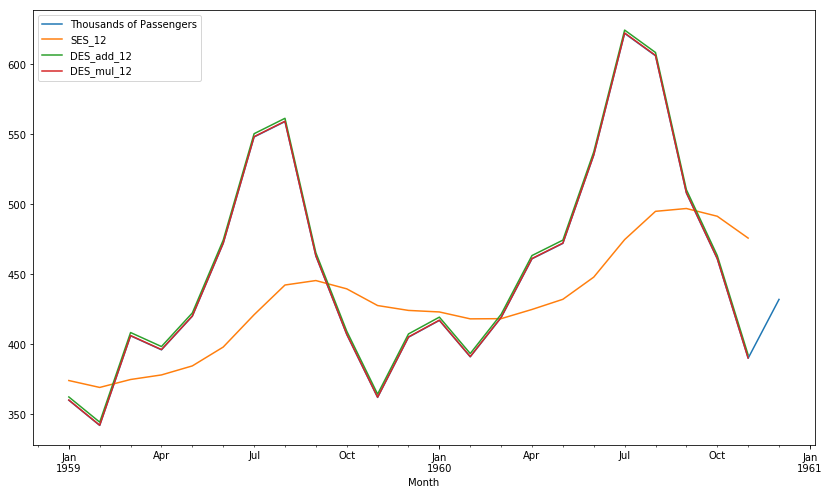

In [58]:
airline[['Thousands of Passengers', 'SES_12','DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(14,8))

### Triple exponential smoothing (Holt method)

In [59]:
airline['TES_mul_12'] = ExponentialSmoothing(airline['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

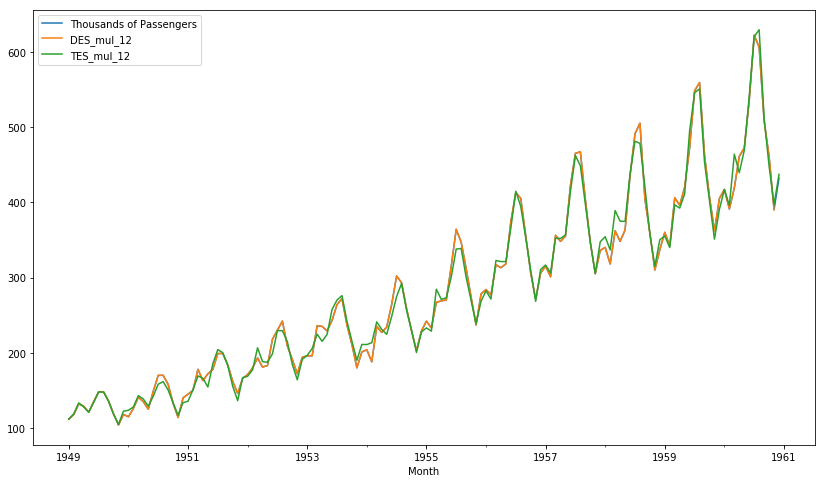

In [60]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].plot(figsize=(14,8))

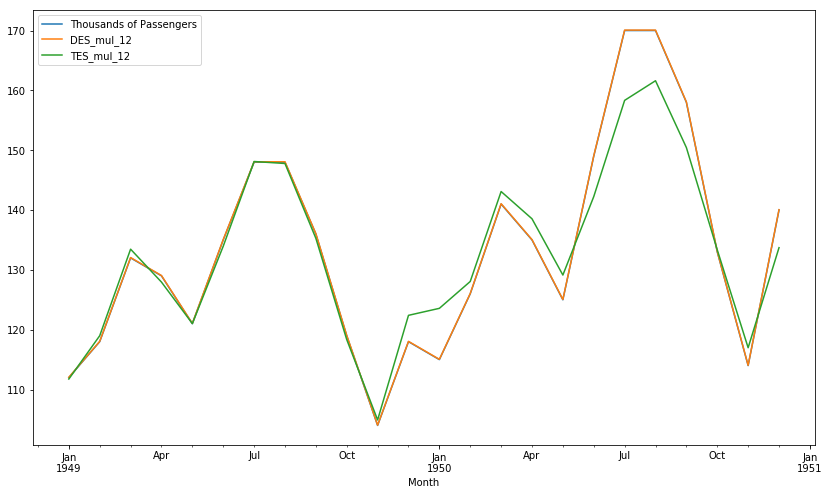

In [61]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(14,8))

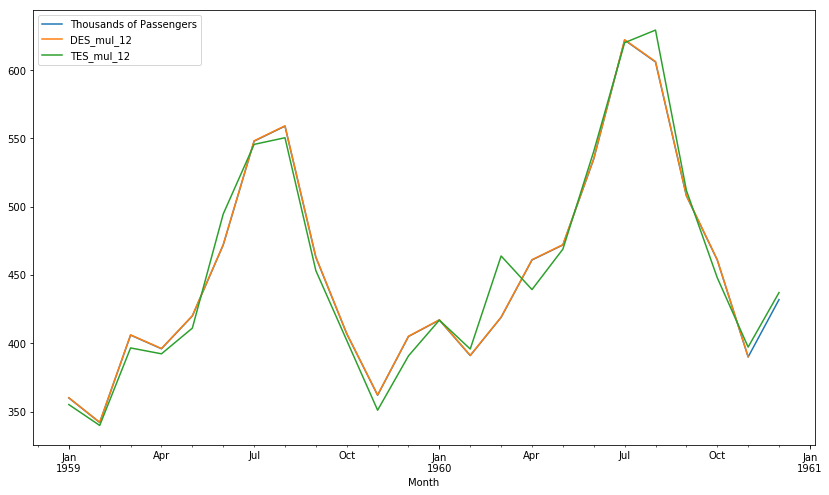

In [62]:
airline[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(14,8))